In [ ]:
#nashville

In [26]:
import requests
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file)
tree_data = pd.read_csv('Austin_Final_2022-06-18.csv')

In [27]:
# Print value counts of a specific column
column_value_counts = tree_data["common_name"].value_counts()
print(column_value_counts)

common_name
Pecan                               916
Cedar elm                           831
Southern live oak                   789
small vacant planting site          610
Crape myrtle (including hybrids)    609
                                   ... 
Chinese parasol tree                  1
Western soapberry                     1
Osage orange                          1
Texas olive                           1
Canby oak                             1
Name: count, Length: 111, dtype: int64


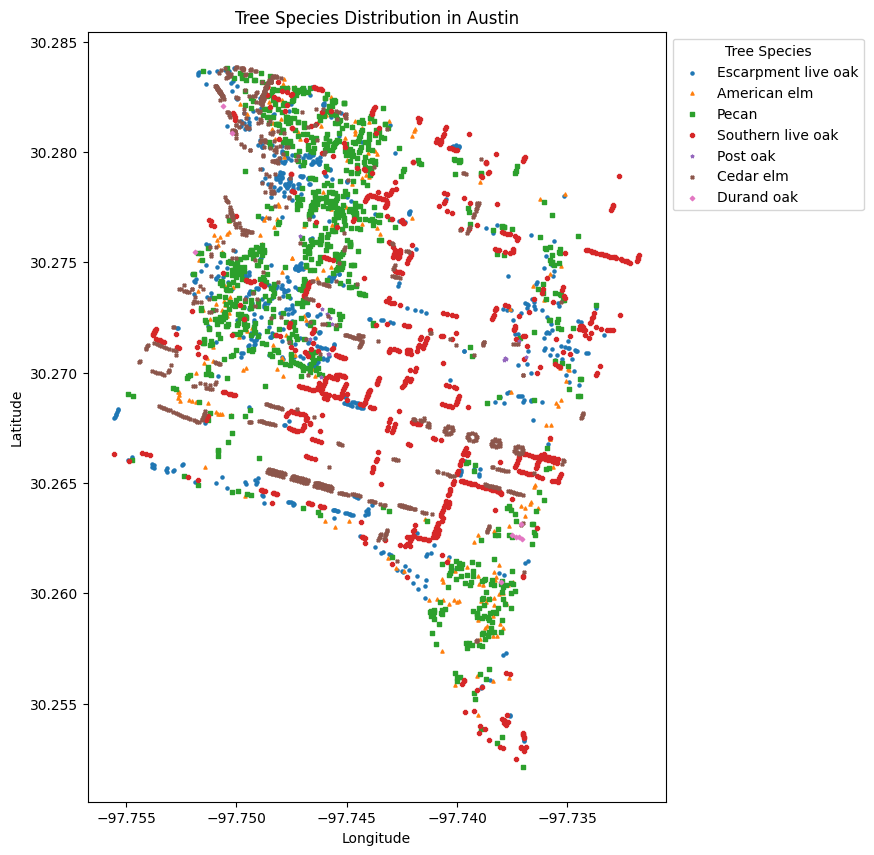

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Remove rows with missing coordinates and species name for plotting
tree_data_filtered = tree_data.dropna(subset=['longitude_coordinate', 'latitude_coordinate', 'common_name'])

# Create a GeoDataFrame from the dataset
geometry = gpd.points_from_xy(tree_data_filtered['longitude_coordinate'], tree_data_filtered['latitude_coordinate'])
gdf = gpd.GeoDataFrame(tree_data_filtered, geometry=geometry)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting each species with a unique marker
# Geopandas does not support markers directly, so we use pandas unique values to iterate over species
unique_species = tree_data_filtered['common_name'].unique()
markers = ['o', '^', 's', 'P', '*', 'X', 'D']  # Define a set of markers for different species

for i, species in enumerate(unique_species[:len(markers)]):  # Limit to number of available markers
    species_gdf = gdf[gdf['common_name'] == species]
    species_gdf.plot(ax=ax, marker=markers[i % len(markers)], label=species, markersize=5)

# Customize the plot
plt.legend(title="Tree Species", loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Tree Species Distribution in Austin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
